In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = '../input/garbage-classification/garbage classification/Garbage classification'
valid_path = '../input/garbage-classification/garbage classification/Garbage classification'

In [3]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')

Found 2276 images belonging to 6 classes.


In [4]:
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 251 images belonging to 6 classes.


In [5]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [6]:
model = Sequential()
model.add(base_model)

model.add(GlobalAveragePooling2D())


model.add(Dense(units=512, activation='relu'))  
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                        

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())                
model.add(Dropout(0.2))                       

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
143/143 - 68s - loss: 2.2701 - accuracy: 0.2113 - val_loss: 19.8554 - val_accuracy: 0.1992 - 68s/epoch - 473ms/step
Epoch 2/20
143/143 - 36s - loss: 2.0480 - accuracy: 0.2412 - val_loss: 6.0787 - val_accuracy: 0.1793 - 36s/epoch - 249ms/step
Epoch 3/20
143/143 - 35s - loss: 1.9204 - accuracy: 0.2632 - val_loss: 10.0757 - val_accuracy: 0.2032 - 35s/epoch - 245ms/step
Epoch 4/20
143/143 - 35s - loss: 1.9163 - accuracy: 0.2535 - val_loss: 7.6459 - val_accuracy: 0.2430 - 35s/epoch - 247ms/step
Epoch 5/20
143/143 - 35s - loss: 1.8023 - accuracy: 0.2900 - val_loss: 3.3895 - val_accuracy: 0.2550 - 35s/epoch - 248ms/step
Epoch 6/20
143/143 - 36s - loss: 1.7580 - accuracy: 0.3264 - val_loss: 61.5662 - val_accuracy: 0.1594 - 36s/epoch - 250ms/step
Epoch 7/20
143/143 - 36s - loss: 1.6843 - accuracy: 0.3502 - val_loss: 1.8409 - val_accuracy: 0.3068 - 36s/epoch - 250ms/step
Epoch 8/20
143/143 - 35s - loss: 1.5878 - accuracy: 0.3783 - val_loss: 2.5105 - val_accuracy: 0.3466 - 35s/epoch - 

In [9]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [10]:
base_model.trainable=True
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=4, verbose=2)
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

Epoch 1/4
143/143 - 35s - loss: 1.0151 - accuracy: 0.6270 - val_loss: 7.3894 - val_accuracy: 0.5697 - 35s/epoch - 248ms/step
Epoch 2/4
143/143 - 35s - loss: 0.9015 - accuracy: 0.6850 - val_loss: 405.7138 - val_accuracy: 0.5498 - 35s/epoch - 247ms/step
Epoch 3/4
143/143 - 35s - loss: 0.9351 - accuracy: 0.6648 - val_loss: 151.1612 - val_accuracy: 0.5936 - 35s/epoch - 246ms/step
Epoch 4/4
143/143 - 35s - loss: 0.8508 - accuracy: 0.6863 - val_loss: 64.4413 - val_accuracy: 0.6414 - 35s/epoch - 248ms/step


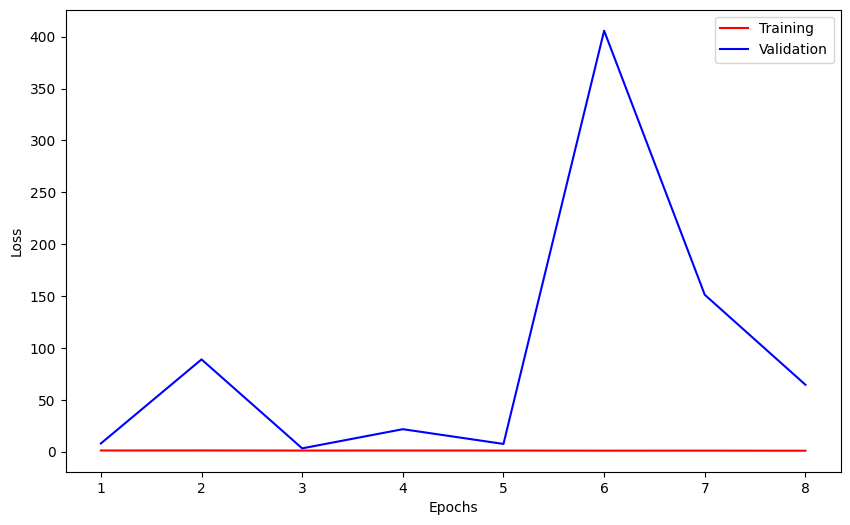

In [13]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

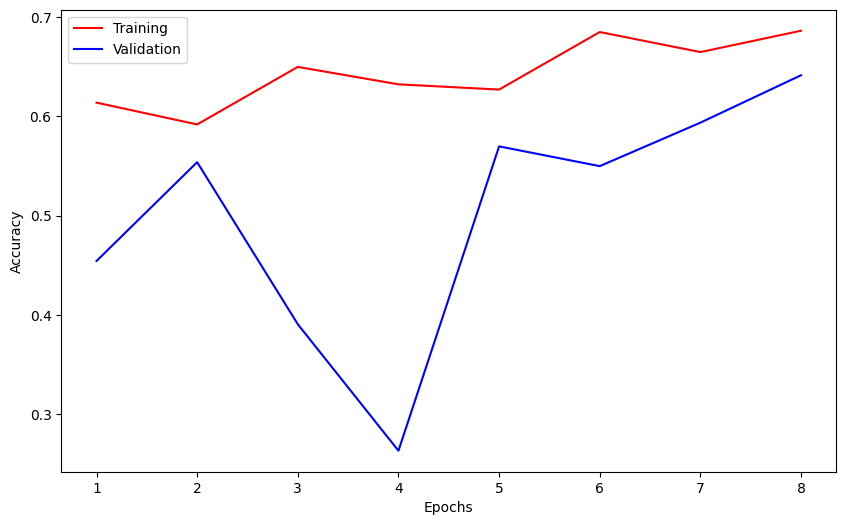

In [14]:
epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs1,accuracy,c="red",label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs1)
plt.legend()

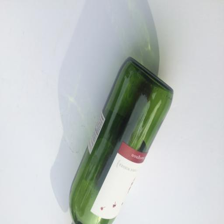

In [36]:
from PIL import Image
path = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass/glass105.jpg'
img = Image.open(path)
img = img.resize((224, 224))
display(img)
x = keras.preprocessing.image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis=0)


In [37]:
images = np.vstack([x])

In [38]:
images


array([[[[0.8745098 , 0.87058824, 0.8901961 ],
         [0.8745098 , 0.87058824, 0.8901961 ],
         [0.8745098 , 0.87058824, 0.8901961 ],
         ...,
         [0.8117647 , 0.81960785, 0.8       ],
         [0.8117647 , 0.81960785, 0.8       ],
         [0.8117647 , 0.81960785, 0.8       ]],

        [[0.8745098 , 0.87058824, 0.8901961 ],
         [0.8745098 , 0.87058824, 0.8901961 ],
         [0.8745098 , 0.87058824, 0.8901961 ],
         ...,
         [0.81960785, 0.827451  , 0.8156863 ],
         [0.81960785, 0.827451  , 0.8156863 ],
         [0.81960785, 0.827451  , 0.8156863 ]],

        [[0.8784314 , 0.8745098 , 0.89411765],
         [0.8784314 , 0.8745098 , 0.89411765],
         [0.8784314 , 0.8745098 , 0.89411765],
         ...,
         [0.8156863 , 0.8235294 , 0.8117647 ],
         [0.8156863 , 0.8235294 , 0.8117647 ],
         [0.8156863 , 0.8235294 , 0.8117647 ]],

        ...,

        [[0.88235295, 0.8980392 , 0.9098039 ],
         [0.88235295, 0.8980392 , 0.9098039 ]

In [39]:
labels = classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [44]:
classes = model.predict(images)


1/1 [==============================] - 0s 20ms/step


In [45]:
pred = labels[np.argmax(classes)]
pred

'paper'

1/1 [==============================] - 0s 20ms/step
Maximum Probability:  1.0
Classified: paper


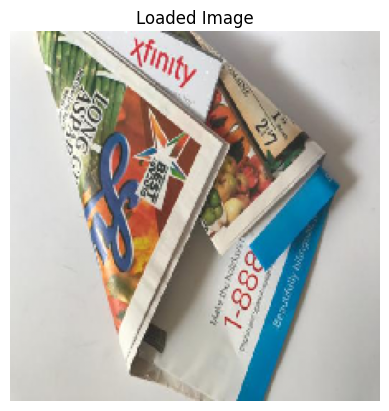

In [47]:
from keras.preprocessing import image

img_path = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper/paper104.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)